Implement the Aitken-Nevill scheme for polynomial interpolation. Test it for numerical differentiation by extrapolation for $f(x) = sin(x)$

$$ D_f(x, h) :=\frac{f(x+h)−f(x)}{h}$$
and
$$ D_{f,sym} := \frac{f(x+h)−f(x−h)}{2h} $$

Choose $x=\pi$,  and interpolation points $h_i=q^i$ for $i ∈ \{0,...n\}$. Generate convergence plot for the errors $f′(x)−D_f(x,0)$. Try  different refinement ratios $q∈(0,1)$. How does this effect speed of convergence, and reachable accuracy? Since $\underset{h→0}{lim} D_{f,sym}(x,h) = \underset{h→0}{lim}D_{f,sym}(x,\sqrt{h})$, try also extrapolation of the function $h→D_{f,sym}(x,\sqrt{h})$.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def aitken_neville(x_nodes, y_nodes, x):
    p = y_nodes
    n = len(x_nodes)-1
    
    for m in range(n):
        for i in range(n-m):
            j = i+1+m
            p[i] = ((x-x_nodes[j]) * p[i] - (x-x_nodes[i]) * p[i+1]) / (x_nodes[i] - x_nodes[j])
    
    return p[0]

Testing of the implementation in a numerical differentiation by extrapolation.
$$f(x) = sin(x)$$
$$f'(x) = cos(x)$$
$$f'(\pi) = -1 $$

In [81]:
n_list = np.arange(3, 8)
q_list = np.linspace(0.01, 0.9, 40)

error_matrix_single = np.empty((len(n_list), len(q_list)))
error_matrix_sym = np.empty((len(n_list), len(q_list)))
error_matrix_sym_sqrt = np.empty((len(n_list), len(q_list)))

for n_idx, n in enumerate(n_list):
    for q_idx, q in enumerate(q_list):
        h_i = q ** np.arange(n+1)

        f_hi = np.sin(np.pi + h_i)
        f_neg_hi = np.sin(np.pi - h_i)
        f_sqrt_hi = np.sin(np.pi + np.sqrt(h_i))
        f_neg_sqrt_hi = np.sin(np.pi - np.sqrt(h_i))

        f_x0 = 0

        D_f = (f_hi - f_x0)/h_i
        D_f_sym = (f_hi - f_neg_hi)/(2*h_i)
        D_f_sym_sqrt = (f_sqrt_hi - f_neg_sqrt_hi)/(2*np.sqrt(h_i))

        single_estimate = aitken_neville(h_i, D_f, 0)
        sym_estimate = aitken_neville(h_i, D_f_sym, 0)
        sym_sqrt_estimate = aitken_neville(h_i, D_f_sym_sqrt, 0)
    
        error_matrix_single[n_idx, q_idx] = abs(-1 - single_estimate)
        error_matrix_sym[n_idx, q_idx] = abs(-1 - sym_estimate)
        error_matrix_sym_sqrt[n_idx, q_idx] = abs(-1 - sym_sqrt_estimate)

Text(0.5, 0, 'refinement ratios q')

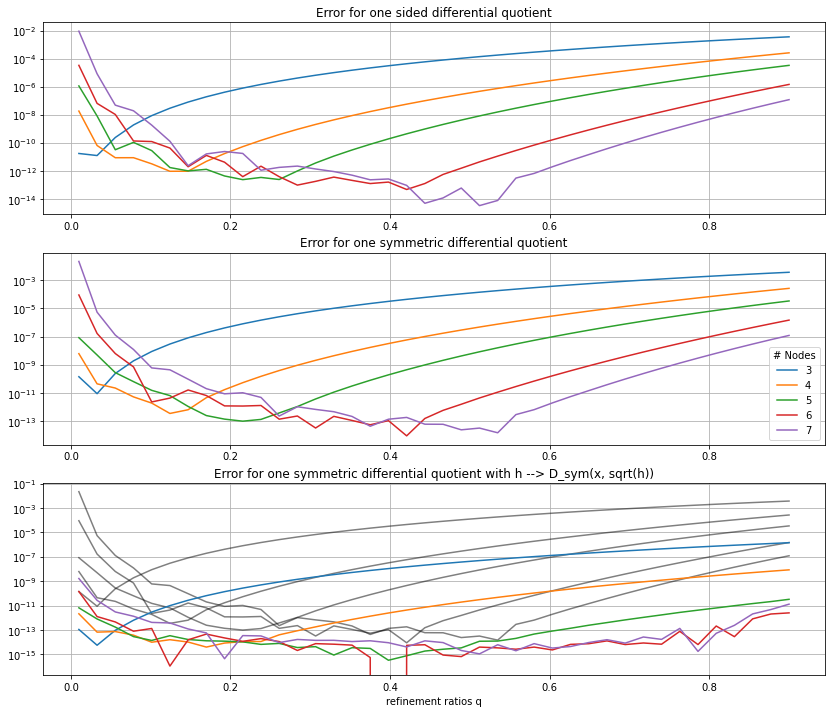

In [89]:
fig, axes = plt.subplots(3, 1, figsize = (14, 12))
axes[0].plot(q_list, error_matrix_single.T)
axes[0].set_yscale('log')

axes[1].plot(q_list, error_matrix_sym.T)
#axes[1].plot(q_list, error_matrix_sym_sqrt.T, 'k')
axes[1].set_yscale('log')

axes[1].legend([str(x) for x in n_list], title="# Nodes")

axes[2].plot(q_list, error_matrix_sym.T, 'k', alpha=0.5)
axes[2].plot(q_list, error_matrix_sym_sqrt.T)
axes[2].set_yscale('log')

axes[0].grid()
axes[1].grid()
axes[2].grid()
axes[0].set_title("Error for one sided differential quotient")
axes[1].set_title("Error for one symmetric differential quotient")
axes[2].set_title("Error for one symmetric differential quotient with h --> D_sym(x, sqrt(h))")
axes[2].set_xlabel("refinement ratios q")



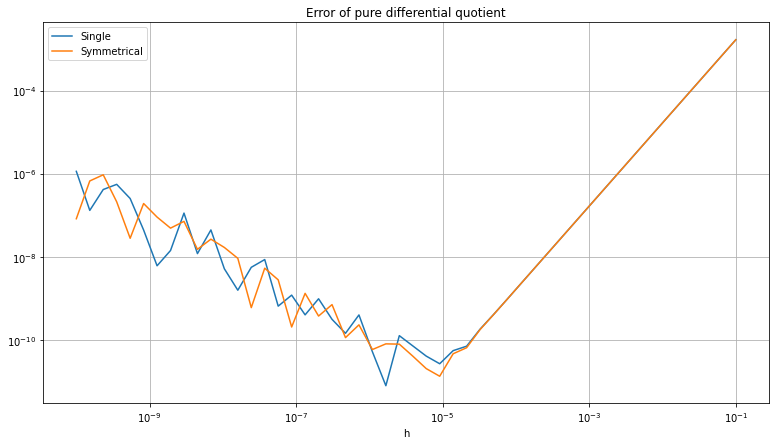

In [87]:
h_i_list = np.logspace(-1, -10)

error_vektor_single = np.empty(len(h_i_list))
error_vektor_sym = np.empty(len(h_i_list))

for idx, h_i in enumerate(h_i_list):
    D_f = (np.sin(np.pi + h_i))/h_i
    D_f_sym = (np.sin(np.pi + h_i) - np.sin(np.pi - h_i))/(2*h_i)
    
    error_vektor_single[idx] = abs(-1 - D_f)
    error_vektor_sym[idx] = abs(-1 - D_f_sym)

plt.figure(figsize = (13, 7))
plt.loglog(h_i_list, error_vektor_single, label="Single")
plt.loglog(h_i_list, error_vektor_sym, label="Symmetrical")
plt.grid()
plt.title("Error of pure differential quotient")
plt.xlabel("h")
plt.legend()
    